In [22]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import regexp_tokenize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('hotel-reviews.csv')

In [3]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
response = pd.get_dummies(df.Is_Response)

In [5]:
data = pd.concat((df,response),axis = 1)

In [6]:
data = data.drop(columns=['User_ID','Browser_Used','Device_Used','Is_Response','not happy'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 2 columns):
Description    38932 non-null object
happy          38932 non-null uint8
dtypes: object(1), uint8(1)
memory usage: 342.3+ KB


In [13]:
sw = stopwords.words('english')
stem = PorterStemmer()

In [51]:
def textprocess(texts):
    text = texts.lower()
    text = word_tokenize(text)
    text = [w for w in text if w not in sw]
    text = [stem.stem(i) for i in text]
    text = " ".join(text)
    text = regexp_tokenize(text,'\w+')
    text = " ".join(text)
    return text

In [52]:
data.Description = data.Description.apply(textprocess)

In [53]:
data.head()

,Description,happy
0,room kind clean veri strong smell dog gener av...,0
1,stay crown plaza april april staff friendli at...,0
2,book hotel hotwir lowest price could find got ...,0
3,stay husband son way alaska crui love hotel gr...,1
4,girlfriend stay celebr th birthday plan weeken...,0


In [100]:
sample = data.iloc[:5,:]

In [149]:
text_split = data.Description.apply(lambda x : x.split())

In [150]:
text_frequency = nltk.FreqDist(dict(text_split))

In [151]:
from wordcloud import WordCloud
wc = WordCloud().generate(" ".join(data.Description))

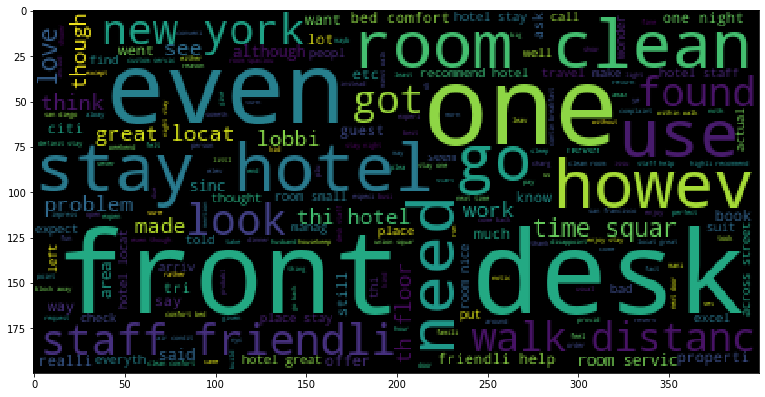

In [153]:
plt.figure(figsize = (13,13))
plt.imshow(wc)